In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [4]:
ad_clicks = pd.read_csv('Social_Network_Ads.csv')
ad_clicks

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


Categorical Variables

In [11]:
categorical = [var for var in ad_clicks.columns if ad_clicks[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Gender']


In [13]:
for var in categorical: 
    
    print(ad_clicks[var].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64


In [16]:
for var in categorical:
    
     print(ad_clicks[var].value_counts()/np.float(len(ad_clicks)))

Female    0.51
Male      0.49
Name: Gender, dtype: float64


In [17]:
ad_clicks['Purchased'].nunique()

2

In [18]:
ad_clicks['Purchased'].unique()

array([0, 1])

In [19]:
ad_clicks['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

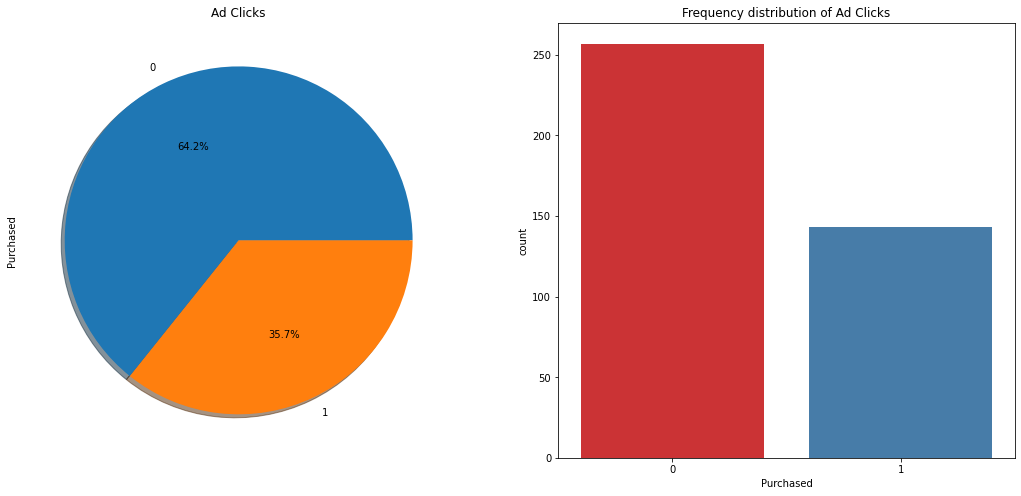

In [22]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ad_clicks['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Ad Clicks')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")
ax[1].set_title("Frequency distribution of Ad Clicks")

plt.show()

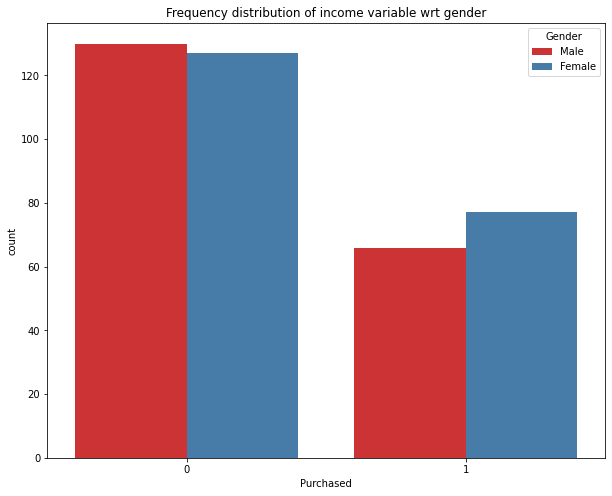

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Purchased", hue="Gender", data=ad_clicks, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt gender")
plt.show()

Numerical Variables

In [26]:
numerical = [var for var in ad_clicks.columns if ad_clicks[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 4 numerical variables

The numerical variables are :

 ['User ID', 'Age', 'EstimatedSalary', 'Purchased']


In [28]:
ad_clicks[numerical].head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [30]:
ad_clicks['Age'].nunique()

43

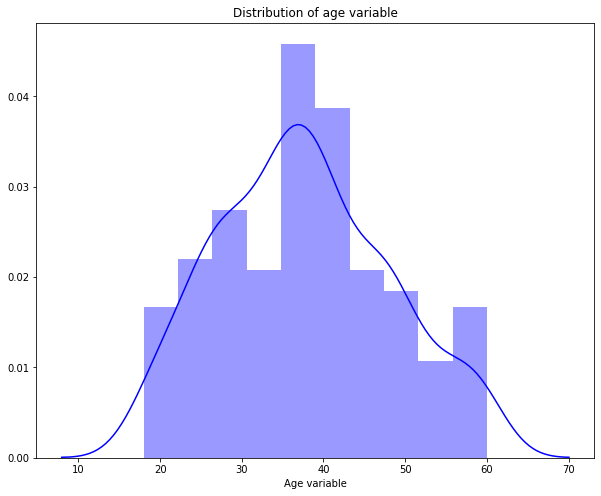

In [155]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

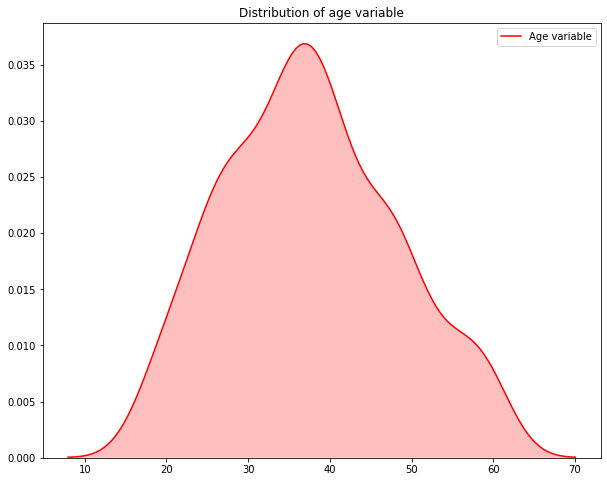

In [33]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

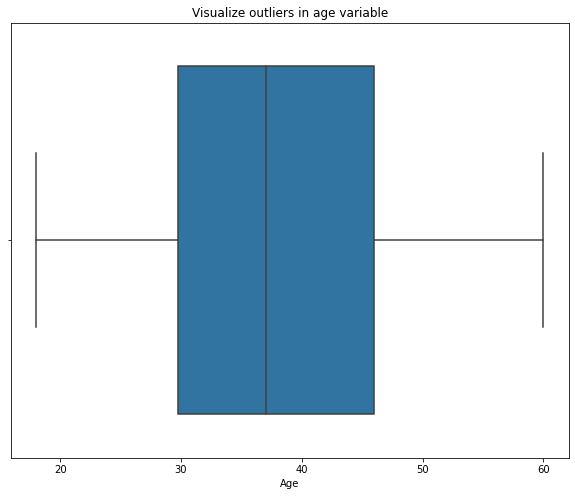

In [36]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

Age and Purchased/Unpurchased

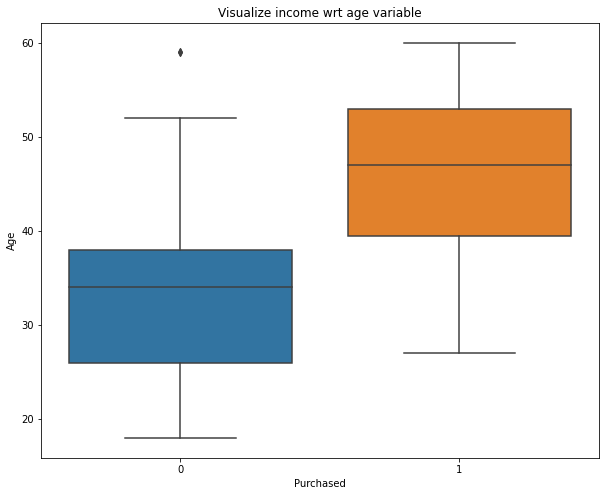

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt age variable")
plt.show()

Age and Gender, Purchased/Unpurchased

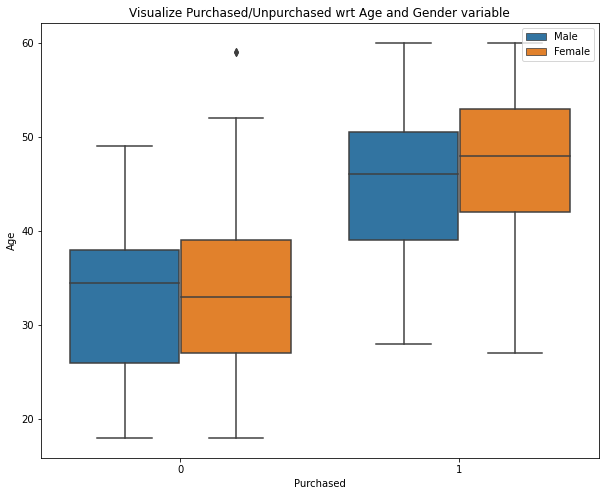

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Age and Gender variable")
ax.legend(loc='upper right')
plt.show()

Gender-Age Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

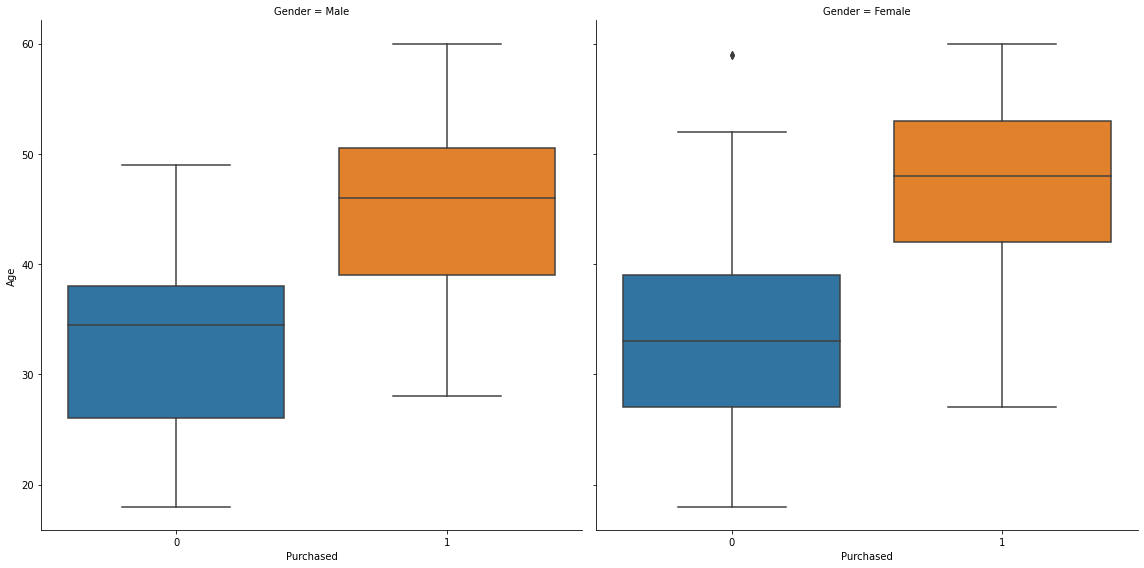

In [40]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="Age", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

Salary Variable

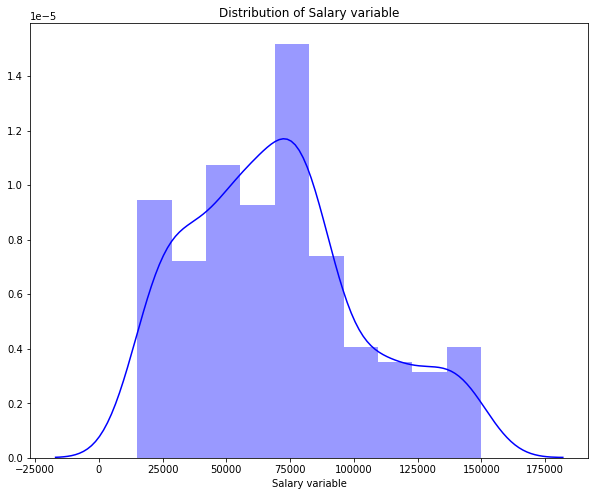

In [42]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
x = pd.Series(x, name="Salary variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Salary variable")
plt.show()

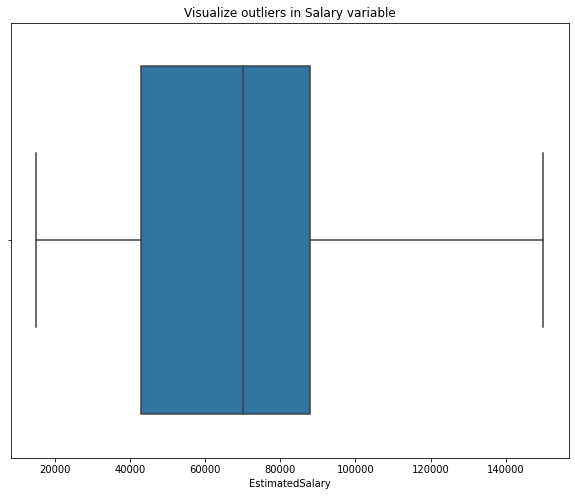

In [43]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Salary variable")
plt.show()

Salary, Purchased/Unpurchased

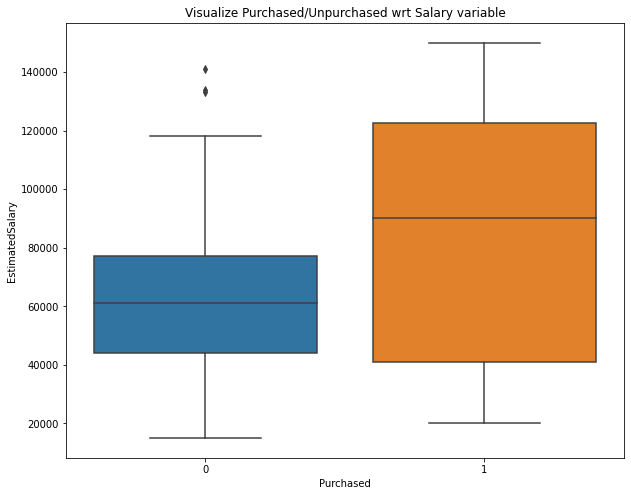

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary variable")
plt.show()

Salary and Gender, Purchased/Unpurchased

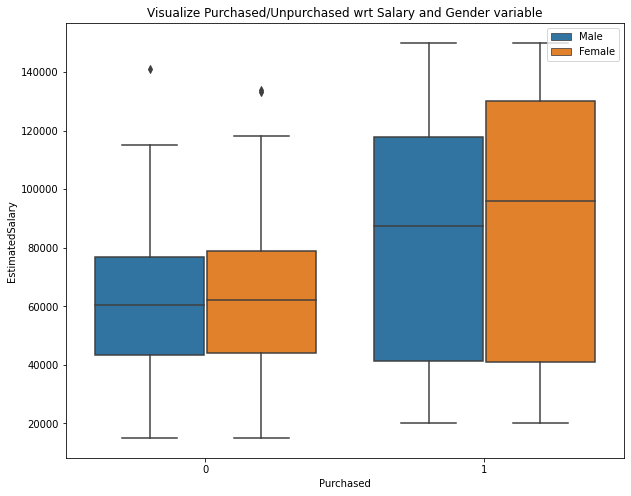

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary and Gender variable")
ax.legend(loc='upper right')
plt.show()

Salary-Gender Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

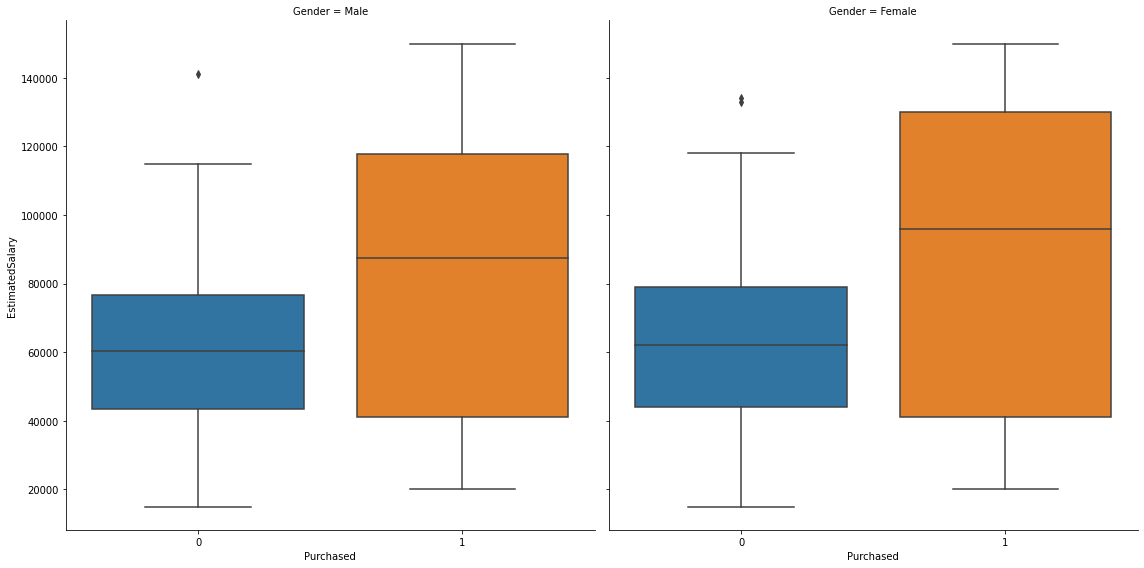

In [47]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

In [51]:
ad_clicks_drop = ad_clicks.drop('User ID', 1)
ad_clicks_drop = ad_clicks_drop
ad_clicks_drop.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,EstimatedSalary,Purchased
Age,1.0,0.1552,0.6225
EstimatedSalary,0.1552,1.0,0.3621
Purchased,0.6225,0.3621,1.0


In [66]:
import itertools

In [67]:
ad_clicks_drop

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [72]:
min_value = ad_clicks['Age'].min()
max_value = ad_clicks['Age'].max()
print(min_value)
print(max_value)
age_bins_ar = np.linspace(min_value,max_value,10)
age_bins_ar

18
60


array([18.        , 22.66666667, 27.33333333, 32.        , 36.66666667,
       41.33333333, 46.        , 50.66666667, 55.33333333, 60.        ])

In [166]:
age_bins = (18, 23, 27, 32, 37, 41, 46, 51, 55, 60)
age_labels = ("18-23", "24-27", "28-32", "33-37", "38-41", "42-46","47-51", "52-55", "56-60")

In [167]:
 # Place the data series into a new column inside of the DataFrame
ad_clicks["Age Group"] = pd.cut(ad_clicks["Age"], age_bins, labels=age_labels)
ad_clicks.head()
total_age_counts = ad_clicks.groupby("Age Group")
age_counts = total_age_counts["User ID"].nunique()
total_users = ad_clicks["Purchased"].count()
percent_values = ((total_age_counts["Age"].count()/total_users)*100)
age_demographics = pd.DataFrame ({"Total Count" : age_counts,
                                 "Percentage of Users" : (percent_values).map("{0:.2f}%".format)})
age_demographics

,Total Count,Percentage of Users
Age Group,,
18-23,29,7.25%
24-27,44,11.00%
28-32,53,13.25%
33-37,79,19.75%
38-41,59,14.75%
42-46,40,10.00%
47-51,45,11.25%
52-55,18,4.50%
56-60,28,7.00%


In [168]:
ad_clicks_drop = ad_clicks.drop('User ID', 1)
ad_clicks_drop

,Gender,Age,EstimatedSalary,Purchased,Age Group
0,Male,19,19000,0,18-23
1,Male,35,20000,0,33-37
2,Female,26,43000,0,24-27
3,Female,27,57000,0,24-27
4,Male,19,76000,0,18-23
...,...,...,...,...,...
395,Female,46,41000,1,42-46
396,Male,51,23000,1,47-51
397,Female,50,20000,1,47-51
398,Male,36,33000,0,33-37


predictive percentage of purchased if white woman aged 31 with salary of 37k

In [169]:
#predictive percentage of purchased if white woman aged 31 with salary of 37k
gender_selection = ad_clicks_drop.loc[ad_clicks['Gender'] == 'Female']
age_selection = gender_selection.loc[gender_selection['Age'] == 31]
count_selection = age_selection.loc[age_selection['Purchased'] == 0]
sel_count = count_selection['Purchased'].count()
total = ad_clicks['Purchased'].count()
perc = sel_count/total*100
print(f"Predictive purchase percentage of F/31/37K is {perc}%")
#not correct as this only accounts for sample 

Predictive purchase percentage of F/31/37K is 1.25%


In [176]:
multi = ad_clicks_drop.groupby(['Purchased', 'Gender', 'Age Group']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi_fill = multi.fillna(0)
multi_fill

Age EstimatedSalary
                           count            mean
Purchased Gender Age Group                      
0         Female 18-23        15    48200.000000
                 24-27        19    53684.210526
                 28-32        21    68047.619048
                 33-37        30    57266.666667
                 38-41        23    66652.173913
                 42-46        10    72300.000000
                 47-51         3    75000.000000
                 52-55         1   114000.000000
                 56-60         2    62500.000000
          Male   18-23        14    59000.000000
                 24-27        23    57173.913043
                 28-32        22    55727.272727
                 33-37        32    58968.750000
                 38-41        25    60840.000000
                 42-46         8    65000.000000
                 47-51         4    80750.000000
                 52-55         0        0.000000
                 56-60         0        0.000000
1         Female 18-23         0        0.000000
                 24-27         2   116500.000000
                 28-32         4   130000.000000
                 33-37         8   121625.000000
                 38-41         4   116000.000000
                 42-46        10    80000.000000
                 47-51        22    80090.909091
                 52-55        13    87923.076923
                 56-60        14    66857.142857
          Male   18-23         0        0.000000
                 24-27         0        0.000000
                 28-32         6   122166.666667
                 33-37         9   109111.111111
                 38-41         7   103285.714286
                 42-46        12    72500.000000
                 47-51        16    51250.000000
                 52-55         4    82750.000000
                 56-60        12    87250.000000